In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy
c = scipy.constants.c #speed of light
h = scipy.constants.h #Planck
e = scipy.constants.e #elemetry charge
hc = h*c/e*1e9 #wavelenght in nm
print(hc)
def eVnm_converter(value):
    #Planck's constant (6.6261 x 10-34 J*s) and c is the speed of light (2.9979 x 108 m/s)
    return hc/value

1239.8419843320025


In [3]:
def interference_function(x,N):
    return np.square(np.sin(N*x)/np.sin(x))
def intensity_function(x):
    return np.square(np.sin(x)/x)

def grating_function(N,k,d,p,s):
    x_interference = k*d*p/2
    x_intensity = k*s*p/2
    return interference_function(x_interference,N)*intensity_function(x_intensity)*np.square(N)

/tmp/ipykernel_937681/1032030416.py:2: RuntimeWarning: invalid value encountered in divide
  return np.square(np.sin(N*x)/np.sin(x))


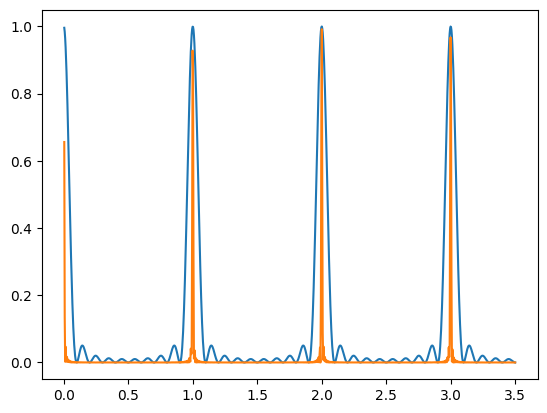

In [5]:
s = 100
d = 200
wl = 130
k = 2*np.pi/wl
m = np.linspace(0.,3.5,1000)
p = m*wl/d
x_interference = k*d*p/2
x_intensity = k*s*p/2
plt.plot(m,interference_function(x_interference,10)/100)
plt.plot(m,interference_function(x_interference,100)/10000)
#plt.plot(m,intensity_function(x_intensity))
#plt.plot(m,intensity_function(x_intensity)*interference_function(x_interference,10)/100)
#plt.plot(m,grating_function(10,k,d,p,s)/100)

In [39]:
def calc_box(m,energy,a,d,z,delta,beta,M=1000):
    """
    energy in eV
    m orders
    M number of grating lines
    a width of grating in nm
    d pitch of grating in nm
    z thickness of grating in nm
    delta same shape as energy
    beta same shape as energy
    """
    q = 2*np.pi/eVnm_converter(energy)
    a_d = a/d
    T_m = np.zeros((len(m)))
    for i,entry in enumerate(m):
        if entry == 0:
            T = np.square(a_d) + np.square(1-a_d)*np.exp(-2*q*z*beta) + 2*a_d*(1-a_d)*np.exp(-q*z*beta)*np.cos(q*z*delta)
        else:      
            m_pi = entry * np.pi
            T= np.square(np.sin(M*m_pi)/(M*np.sin(m_pi))) * np.square(np.sin(a_d*m_pi)/m_pi) * (1+np.exp(-2*q*z*beta)-2*np.exp(-q*z*beta)*np.cos(q*z*delta))
        #print(T)
        T_m[i] = T
    return T_m#.flatten()

Text(0, 0.5, 'Intensity')

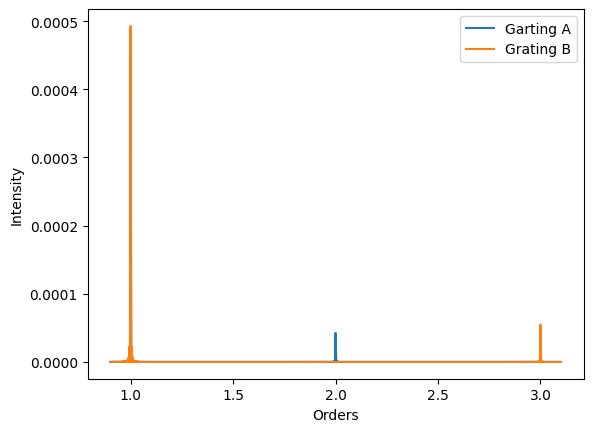

In [68]:
energy = 100
beta = 1e-3
delta = -1e-3
#T_layer = calc_layer([energy],aoi,thickness,[delta], [beta])
a =60
pitch = 100
thickness = 100
x = np.linspace(0.9,3.1,10000)
#T_Grating = calc_box(x,energy,a,pitch,thickness,delta,beta)
T_Grating_10 = calc_box(x,energy,a,pitch,thickness,delta,beta,M=300)
T_Grating_100 = calc_box(x,energy,a-10,pitch,thickness,delta,beta,M=300)
#plt.plot(energy,T_layer)
#print(np.sum(T_Grating))
plt.plot(x,T_Grating_10,label='Garting A')
plt.plot(x,T_Grating_100,label='Grating B')
plt.legend()
plt.xlabel('Orders')
plt.ylabel('Intensity')
#plt.yscale('log')
#plt.ylim(1e-11,5e-7)
#plt.xlim(0.975,1.025)

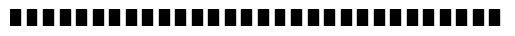

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
a = 60  # width
pitch = 100  # Distance between lines (in arbitrary units)
thickness = 100  # Thickness of lines (in arbitrary units)
N = 30

# Create figure and axis
fig, ax = plt.subplots()

# Draw the grating
for i in range(N):
    x = i * pitch
    ax.add_patch(plt.Rectangle((x, 0), a, thickness, color='black'))

# Set limits and aspect ratio
ax.set_xlim(0, N * pitch)
ax.set_ylim(0, 100)
ax.set_aspect('equal')

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()
